特徵提取 (Feature Extraction)

In [1]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

# 載入預訓練模型
common_texts.append(["fish", "cat", "dog"])
print("訓練資料集:", common_texts)
print()
model = Word2Vec(common_texts, min_count=1, vector_size=300)

def get_sentence_vector(sentence, model):
  """將句子轉換為向量表示."""
  vectors = [model.wv[word] for word in sentence if word in model.wv]
  if not vectors:
    return None  # 或者返回一個預設的向量，例如零向量
  return sum(vectors) / len(vectors)

# 示例文本
sentence = ["human"]
vector = get_sentence_vector(sentence, model)
print(vector)

訓練資料集: [['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey'], ['fish', 'cat', 'dog']]

[ 1.6002206e-03 -1.2094593e-03 -1.4216034e-03  4.0658592e-04
 -1.3757666e-03 -1.8757244e-03  1.0476712e-03  2.7792191e-03
 -2.1818881e-03 -3.0379808e-03 -1.1105891e-03  2.5090785e-03
 -3.2296721e-03  3.1994260e-03 -1.3941566e-04  7.6826813e-04
 -6.1655365e-04 -1.9207029e-03  1.0335651e-03  2.0650295e-03
 -2.3509685e-03 -3.9110542e-04  5.1980693e-04  1.4163239e-03
  2.3804498e-03 -1.1822319e-03  2.4251295e-03 -1.8569903e-03
 -7.3160848e-04  3.0282540e-03  1.7941077e-03 -2.8283524e-03
 -5.5188139e-04 -2.9460737e-03 -5.4729305e-04  1.8852059e-03
 -2.4727657e-03  1.8366897e-03  2.0300196e-03 -1.2568263e-03
 -3.2186047e-03 -8.3960575e-04 -8.5100770e-04  1.2528455e-0

詞彙擴展 (Vocabulary Expansion)

In [22]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

# 載入預訓練模型
# model = Word2Vec(common_texts, min_count=1)

# 尋找與 "London" 最相似的三個詞
similar_words = model.wv.most_similar("dog", topn=3)
print(similar_words)

[('graph', 0.09825022518634796), ('survey', 0.08705343306064606), ('interface', 0.0473613440990448)]


信息檢索 (Information Retrieval)

In [26]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts
from gensim.models import KeyedVectors

# 載入預訓練模型 (這裡需要一個已載入的模型)
# 例如: model = KeyedVectors.load_word2vec_format(model_path, binary=True)

documents = [
    ['human', 'interface', 'computer'], 
    ['survey', 'user', 'computer', 'system', 'response', 'time'], 
    ['eps', 'user', 'interface', 'system'],
]
query = ["interface", "response"]

# 建立文件向量 (簡化版，應使用更完善的方法)
doc_vectors = [get_sentence_vector(doc, model) for doc in documents]

# 計算查詢向量
query_vector = get_sentence_vector(query, model)

# 計算相似度 (此處假設 get_sentence_vector 函數已定義並能正常工作)
if query_vector is not None:
    similarities = [model.wv.cosine_similarities(query_vector, [vec]) for vec in doc_vectors]
    # 找到最相似的文件
    most_similar_doc_index = similarities.index(max(similarities))
    print(f"最相似的文件是：{documents[most_similar_doc_index]}")
else:
    print("查詢向量無法計算，因為詞彙不在模型中。")

最相似的文件是：['human', 'interface', 'computer']


推薦系統 (Recommendation Systems)

In [27]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

# 簡易的用戶行為數據
user_history = {
    "user1": ["London", "Paris", "Berlin"],
    "user2": ["Paris", "Rome", "Madrid"],
}

# 建立一個簡單的模型
model = Word2Vec(list(user_history.values()), min_count=1)

# 獲取用戶1的歷史行為向量
user1_vector = get_sentence_vector(user_history["user1"], model)

# 找到最相似的詞 (推薦)
if user1_vector is not None:
    recommendations = model.wv.most_similar(positive=[user1_vector], topn=2)
    print(recommendations)
else:
    print("用戶向量無法計算。")

[('London', 0.5755724906921387), ('Berlin', 0.5267927646636963)]


可視化 (Visualization)

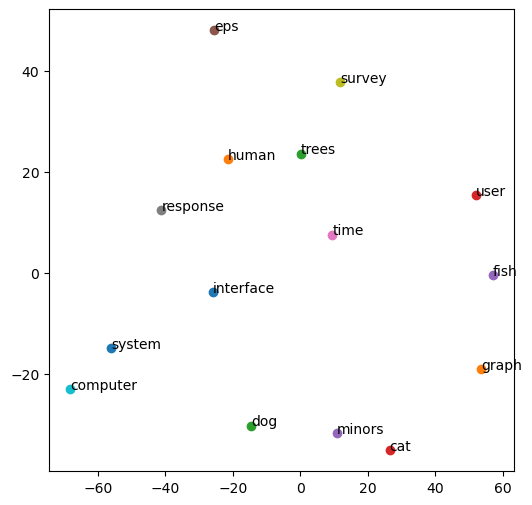

In [48]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# 使用更大的數據集來訓練模型 (這裡只是示意，你需要替換成你自己的數據)
# 假設你已經有了 your_own_corpus
# model = Word2Vec(your_own_corpus, min_count=5, vector_size=100)

# 建立模型 (使用 common_texts 作為示例)
model = Word2Vec(common_texts, min_count=1)

# 準備數據
words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]
vectors = np.array(vectors)

# 使用 t-SNE 降維，並設置 perplexity
tsne = TSNE(n_components=2, random_state=0, perplexity=min(5, len(vectors) - 1))  # 根據樣本數動態調整 perplexity
vectors_2d = tsne.fit_transform(vectors)

# 繪圖
plt.figure(figsize=(6, 6))
for i, word in enumerate(words):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1])
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))
plt.show()

知識圖譜補全 (Knowledge Graph Completion)

In [40]:
import numpy as np

# 定義實體和關係
entities = {"London": 0, "Paris": 1, "Berlin": 2, "UK": 3, "France": 4, "Germany": 5}
relations = {"capital_of": 0}

# 簡化的知識圖譜 (三元組: 頭實體, 關係, 尾實體)
triples = [
    (entities["London"], relations["capital_of"], entities["UK"]),
    (entities["Paris"], relations["capital_of"], entities["France"]),
    (entities["Berlin"], relations["capital_of"], entities["Germany"]),
]

# 初始化實體和關係的向量表示
entity_dim = 2
relation_dim = 2
entity_embeddings = np.random.rand(len(entities), entity_dim)
relation_embeddings = np.random.rand(len(relations), relation_dim)

# 定義 TransE 模型的損失函數 (簡化版)
def score_function(h, r, t):
  return np.linalg.norm(h + r - t)

# 訓練模型 (簡化版)
learning_rate = 0.01
for epoch in range(100):
  for h, r, t in triples:
    h_vec = entity_embeddings[h]
    r_vec = relation_embeddings[r]
    t_vec = entity_embeddings[t]

    # 計算梯度 (簡化版)
    grad_h = 2 * (h_vec + r_vec - t_vec)
    grad_r = 2 * (h_vec + r_vec - t_vec)
    grad_t = -2 * (h_vec + r_vec - t_vec)

    # 更新向量
    entity_embeddings[h] -= learning_rate * grad_h
    relation_embeddings[r] -= learning_rate * grad_r
    entity_embeddings[t] -= learning_rate * grad_t

# 預測 UK 的首都
london_vec = entity_embeddings[entities["UK"]]
capital_of_vec = relation_embeddings[relations["capital_of"]]
predicted_tail = london_vec + capital_of_vec

# 找到最接近的實體
distances = [np.linalg.norm(predicted_tail - entity_embeddings[i]) for i in range(len(entities))]
predicted_entity_index = np.argmin(distances)

# 輸出預測結果
for entity, index in entities.items():
  if index == predicted_entity_index:
    print(f"UK 的首都可能是: {entity}")
    break

UK 的首都可能是: UK
